In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [6]:
dataset = data.copy()

In [7]:
dataset.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [10]:
dataset.shape

(1453, 15)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
dataset.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
dataset.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [12]:
dataset.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


**CHECKING FOR VALUE COUNTS**

In [14]:
dataset['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [15]:
dataset['convenient'].value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

In [16]:
dataset['fattening'].value_counts()

Yes    1260
No      193
Name: fattening, dtype: int64

In [17]:
dataset['greasy'].value_counts()

Yes    765
No     688
Name: greasy, dtype: int64

In [18]:
dataset['fast'].value_counts()

Yes    1308
No      145
Name: fast, dtype: int64

In [19]:
dataset['cheap'].value_counts()

Yes    870
No     583
Name: cheap, dtype: int64

In [20]:
dataset['tasty'].value_counts()

Yes    936
No     517
Name: tasty, dtype: int64

In [21]:
dataset['expensive'].value_counts()

No     933
Yes    520
Name: expensive, dtype: int64

In [22]:
dataset['healthy'].value_counts()

No     1164
Yes     289
Name: healthy, dtype: int64

In [23]:
dataset['disgusting'].value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

In [24]:
dataset['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [25]:
dataset['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [26]:
dataset['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

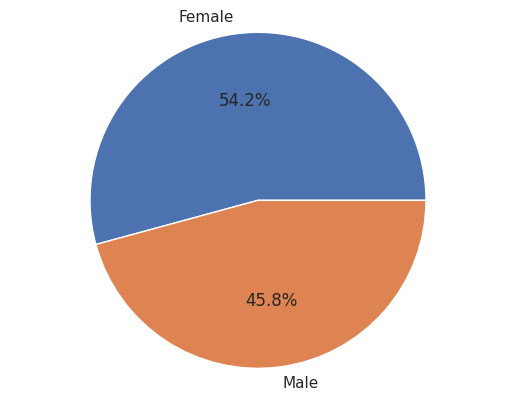

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_counts = dataset['Gender'].value_counts()

sns.set()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

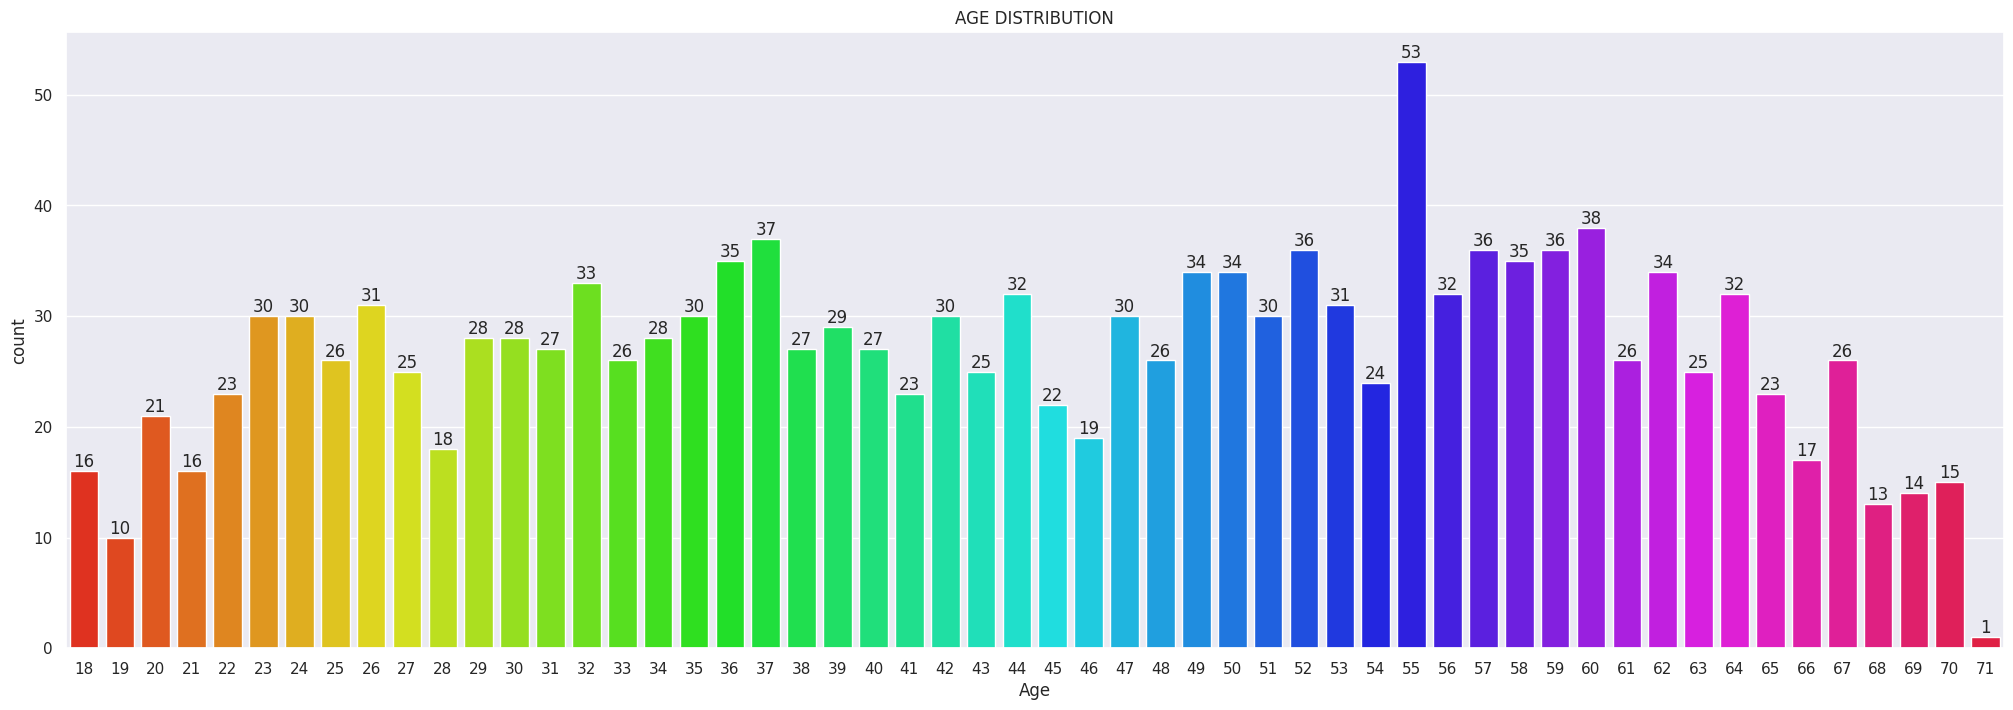

In [30]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=dataset['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('AGE DISTRIBUTION')
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    dataset[x] = LabelEncoder().fit_transform(dataset[x])
    return dataset

column = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting','Like','VisitFrequency','Gender']

for i in column:
    labelling(i)

In [36]:
dataset.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


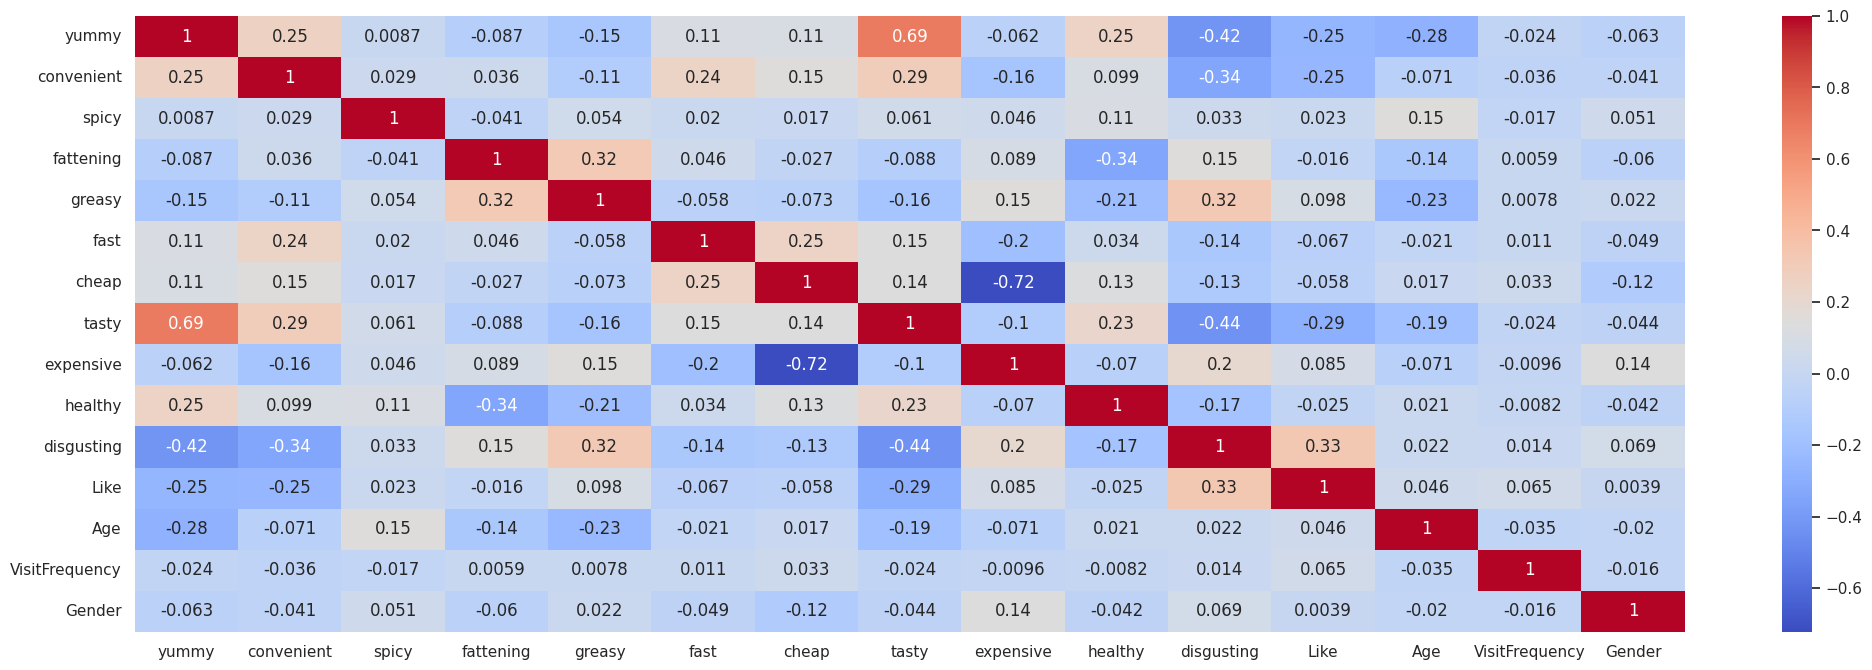

In [38]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [43]:
col = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
x = dataset.loc[:,col]

In [44]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)

In [45]:
loading = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loading_df = pd.DataFrame.from_dict(dict(zip(pc_list, loading)))
loading_df['variable'] = x.columns.values
loading_df = loading_df.set_index('variable')
loading_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


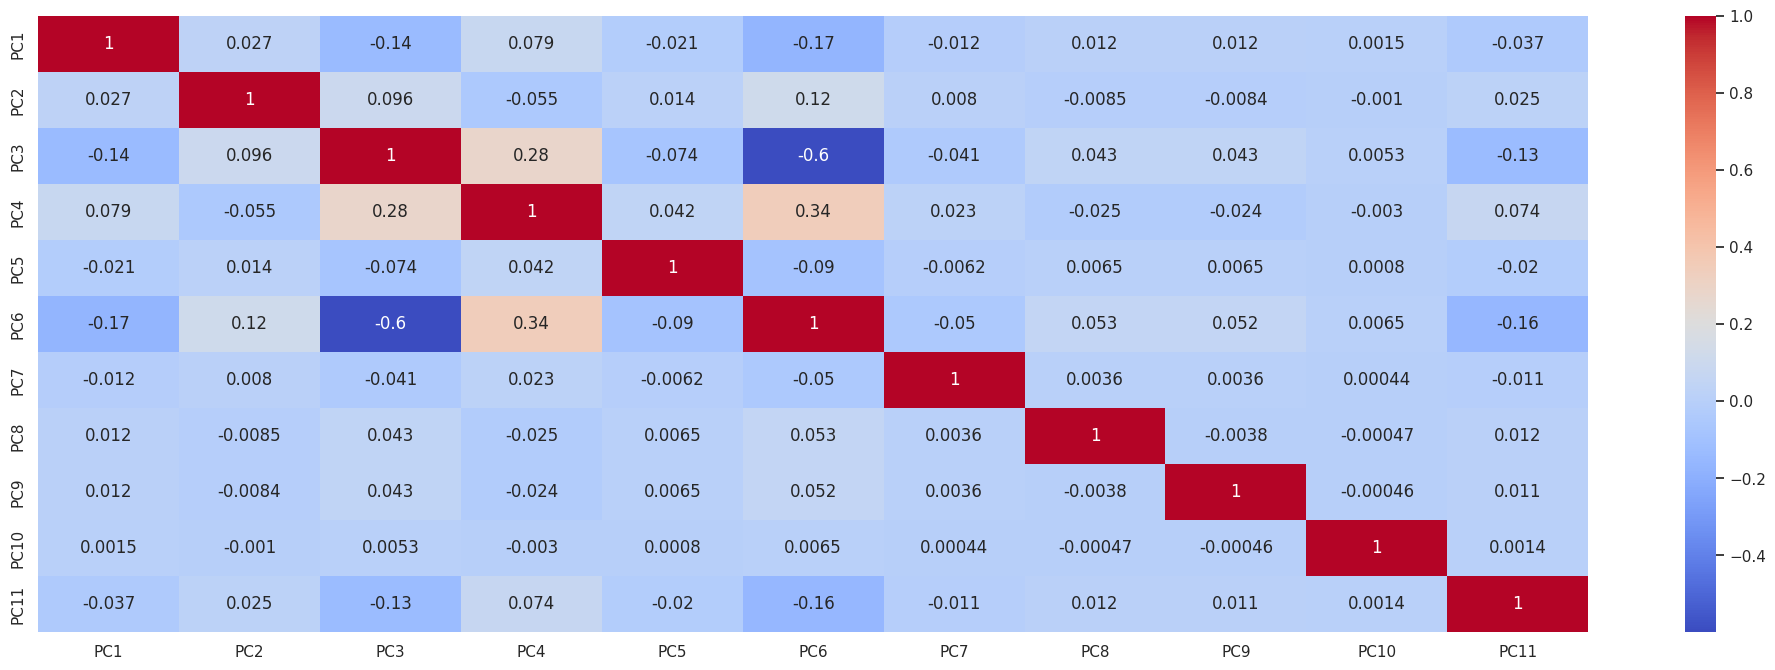

In [47]:
correlation_matrix = loading_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [49]:
X = dataset[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
Y = dataset['Like']


In [50]:
X

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [51]:
Y

0       6
1       1
2       0
3       3
4       1
       ..
1448    9
1449    1
1450    2
1451    3
1452    6
Name: Like, Length: 1453, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split as split
X_train , X_test, Y_train, Y_test = split(X, Y, test_size = 0.25, random_state=0)

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [54]:
Y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score as acs
print("THE ACCURACY IS : ",acs(Y_test,Y_pred)*100)

THE ACCURACY IS :  25.274725274725274
